In [217]:
from functools32 import lru_cache
%pylab notebook
from scipy.integrate import quad
from scipy.integrate import romberg
from scipy.integrate import fixed_quad



Populating the interactive namespace from numpy and matplotlib


In [218]:
xmin=2. ; xmax=7.
nu=linspace(xmin,xmax,1000)

<IPython.core.display.Javascript object>


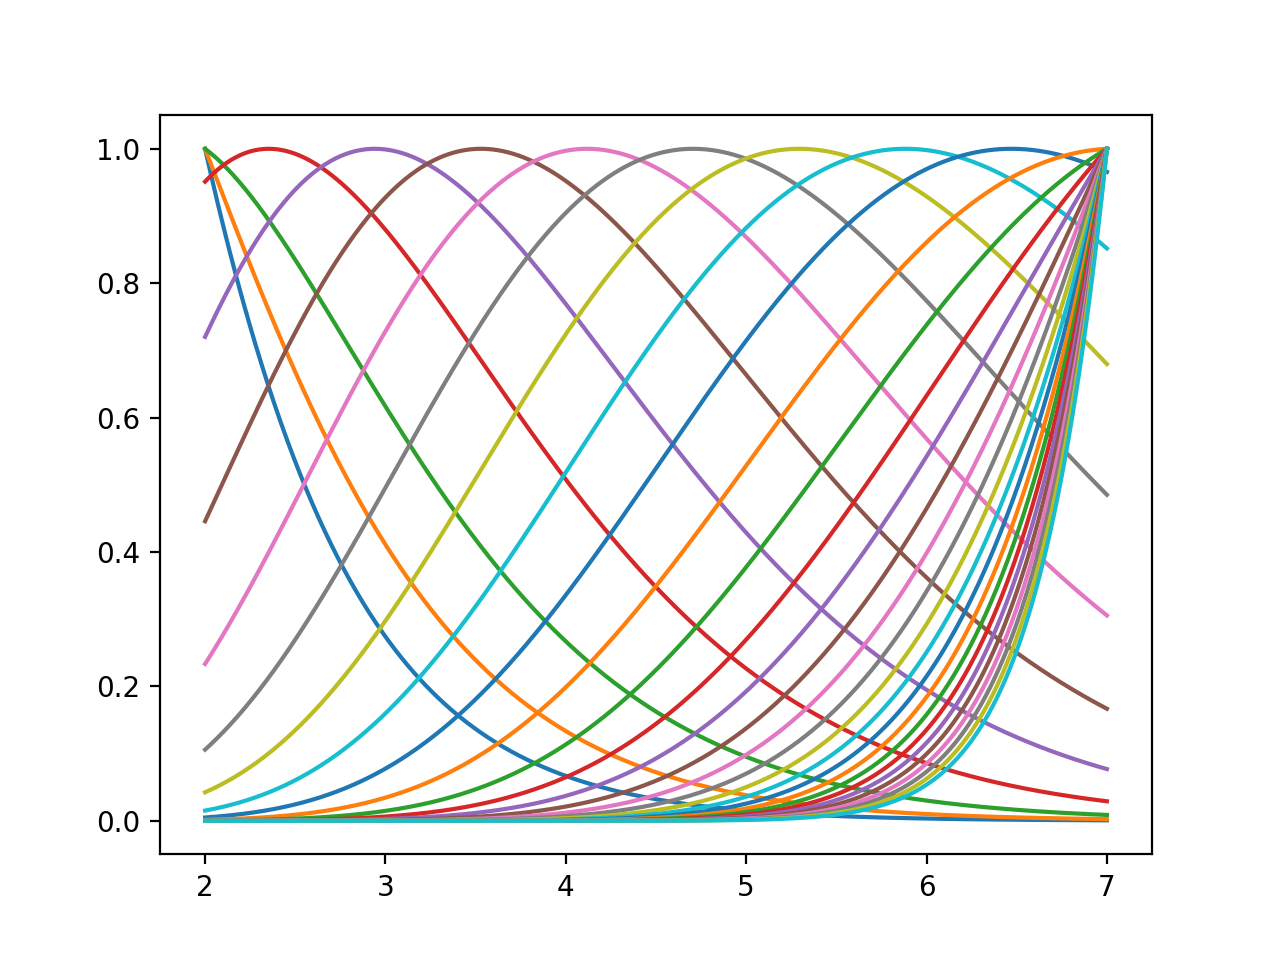

In [219]:
###### 
n=30
v_dir={}
for i in range(n):
    fn= lambda x,n=float(i) : x**(n+1)*exp(-1.7*x)
    y0=max(fn(nu)) #; print y0,nu[fn(nu)==y0]
    fn= lambda x,n=float(i),const=y0 : x**(n+1)*exp(-1.7*x)/const
    v_dir[i]=fn

figure()
for i in xrange(n):
    plot(nu,v_dir[i](nu))
#loglog()
#semilogy()

In [234]:
# Here we only compute basis vectors, the vectors which are really tiny are ignored.
def dot_prod(v1,v2,xmin,xmax):
    return fixed_quad(lambda x: v1(x)*v2(x),xmin,xmax,n=70)[0]

fn_basis={}
def get_gs_basis(v_dir,xmin,xmax):
    cnt=0
    for i in range(len(v_dir)):    
        print "i=",i
        bdotv=[]
        for j in range(len(fn_basis)):
            bdotv=append(bdotv,dot_prod(v_dir[i],fn_basis[j],xmin,xmax))
        temp_fn=(lambda x,coeff=bdotv,wb=len(fn_basis),vec=i: v_dir[vec](x) - sum(coeff[k]*fn_basis[k](x) for k in xrange(wb)))
        norm=dot_prod(temp_fn,temp_fn,xmin,xmax) ; print "Pre normalization",sqrt(norm)
        if norm>1e-5:
            fn_basis[cnt]=(lambda x,const=norm,coeff=bdotv,wb=len(fn_basis),vec=i: (v_dir[vec](x) - sum(coeff[k]*fn_basis[k](x) for k in xrange(wb)))/sqrt(const))
            cnt=cnt+1
        #norm=quad((lambda x: fn_basis[i](x)*fn_basis[i](x)),xmin,xmax)[0] ; print "Post normalization",norm

get_gs_basis(v_dir,xmin,xmax) 

i= 0
Pre normalization 0.62717144918
i= 1
Pre normalization 0.1149296206
i= 2
Pre normalization 0.0397622079877
i= 3
Pre normalization 0.0187207202116
i= 4
Pre normalization 0.00850576159957
i= 5
Pre normalization 0.00334544406077
i= 6
Pre normalization 0.00111115777976
i= 7
Pre normalization 0.00679011460797
i= 8
Pre normalization 0.00099799621454
i= 9
Pre normalization 0.00431126893844
i= 10
Pre normalization 0.000419046260618
i= 11
Pre normalization 0.0015117105903
i= 12
Pre normalization 0.00343044354185
i= 13
Pre normalization 0.000231108545692
i= 14
Pre normalization 0.000660546244529
i= 15
Pre normalization 0.00140511223602
i= 16
Pre normalization 0.00250445063284
i= 17
Pre normalization 0.00397784513259
i= 18
Pre normalization 0.00254677821611
i= 19
Pre normalization 0.00295662225951
i= 20
Pre normalization 0.00340274299036
i= 21
Pre normalization 0.0248997900432
i= 22
Pre normalization 0.0535877764974
i= 23
Pre normalization 0.0895532011427
i= 24
Pre normalization 0.1327208273

In [229]:
fn1_basis={}
for i in range(len(fn_basis)):
    fn1_basis[i]=lru_cache()(lambda x,cnt=i: fn_basis[i](x))

<IPython.core.display.Javascript object>


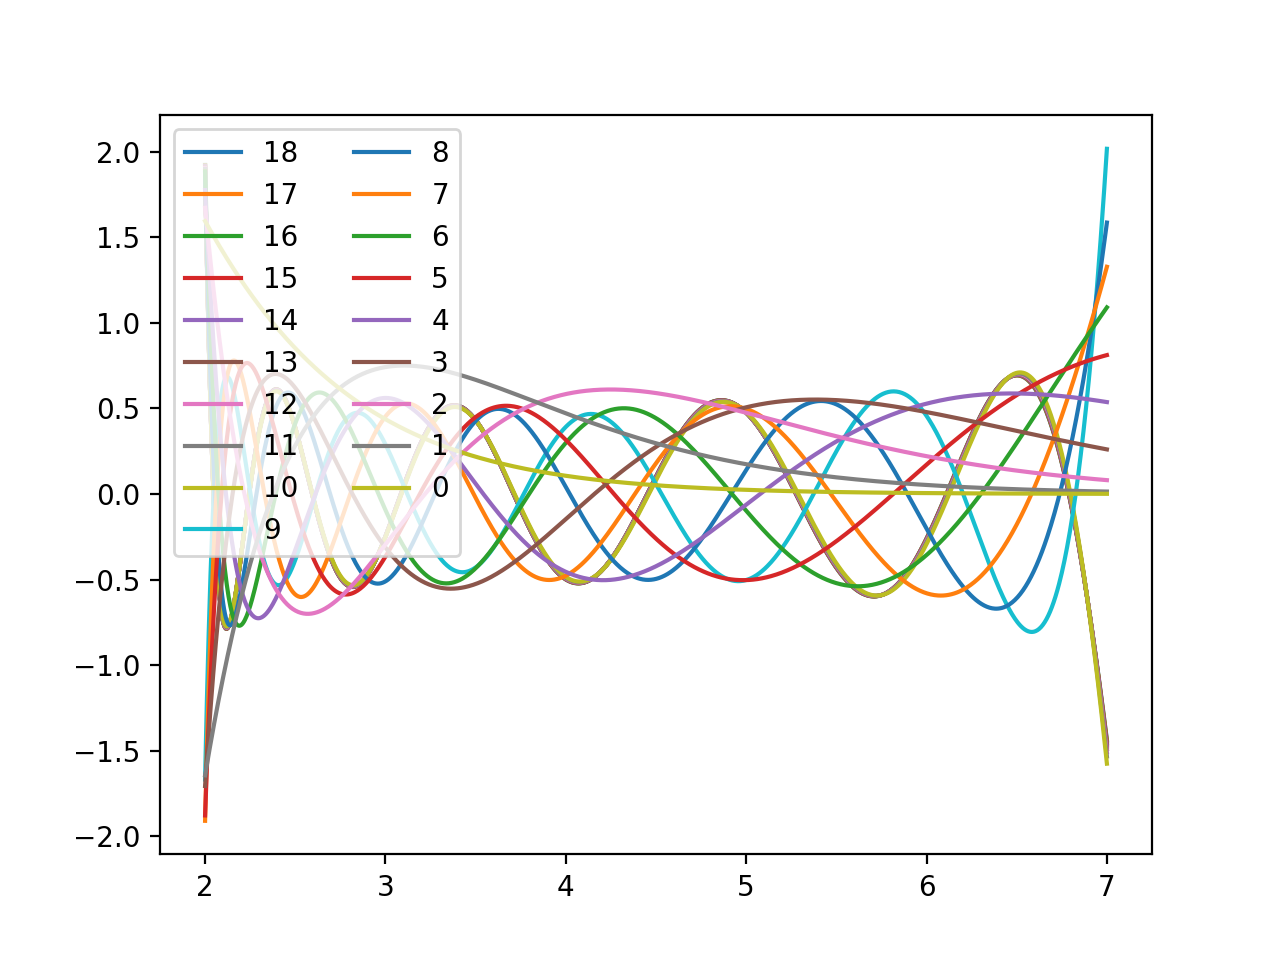

In [232]:
figure()
for i in range(len(fn_basis))[::-1]:
    plot(nu,fn_basis[i](nu),label=str(i))
legend(loc=0,ncol=2)
#semilogx()

In [209]:
cov=zeros((len(fn_basis),len(fn_basis)),float)

for i in xrange(len(fn_basis)):
    print i
    for j in xrange(i+1):
        cov[i,j]=dot_prod(fn_basis[i],fn_basis[j],xmin,xmax)
        cov[j,i]=cov[i,j]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


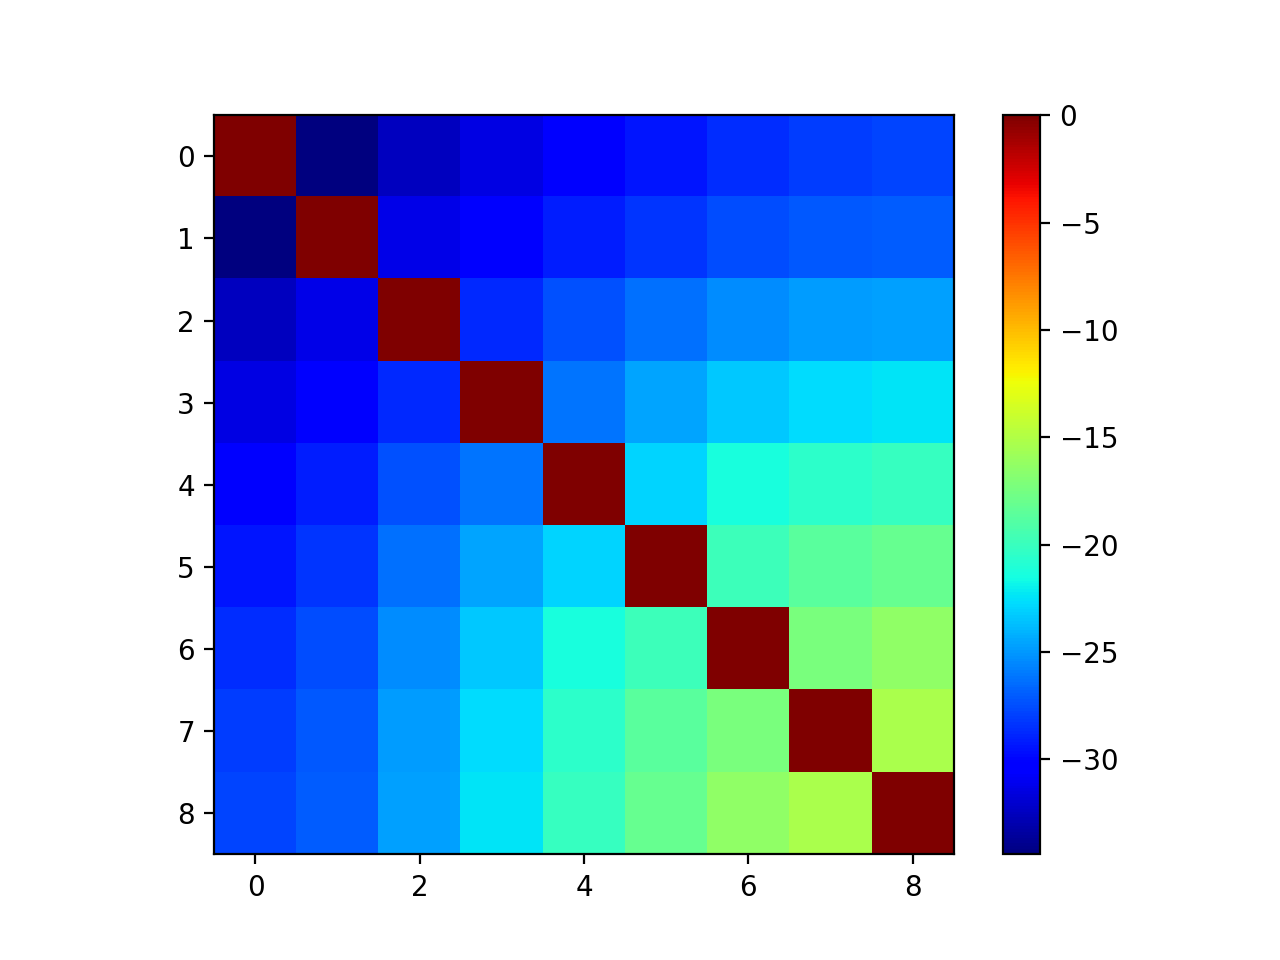

In [205]:
figure()
imshow(log(abs(cov)))
colorbar()

In [184]:
# This just computes all the basis vectors.
def dot_prod(v1,v2,xmin,xmax):
    return fixed_quad(lambda x: v1(x)*v2(x),xmin,xmax,n=60)[0]

fn_basis={}
def get_gs_basis(xmin,xmax):
    for i in range(len(v_dir)):    
        print "i=",i
        bdotv=[]
        for j in range(len(fn_basis)):
            bdotv=append(bdotv,dot_prod(v_dir[i],fn_basis[j],xmin,xmax))
        temp_fn=(lambda x,coeff=bdotv,wb=i: v_dir[wb](x) - sum(coeff[k]*fn_basis[k](x) for k in xrange(wb)))
        norm=dot_prod(temp_fn,temp_fn,xmin,xmax) ; print "Pre normalization",norm
        fn_basis[i]=(lambda x,const=norm,coeff=bdotv,wb=i: (v_dir[wb](x) - sum(coeff[k]*fn_basis[k](x) for k in xrange(wb)))/sqrt(const))
        #norm=quad((lambda x: fn_basis[i](x)*fn_basis[i](x)),xmin,xmax)[0] ; print "Post normalization",norm

get_gs_basis(xmin,xmax) 

i= 0
Pre normalization 0.393344026666
i= 1
Pre normalization 0.0132088176912
i= 2
Pre normalization 0.00158103318406
i= 3
Pre normalization 0.00035046536524
i= 4
Pre normalization 7.23479803888e-05
i= 5
Pre normalization 1.11919959637e-05
i= 6
Pre normalization 1.23467161151e-06
i= 7
Pre normalization 1.00822139632e-07
i= 8
Pre normalization 6.36465292754e-09
i= 9
Pre normalization 1.07915014777e-08
i= 10
Pre normalization 3.57975369876e-06
i= 11
Pre normalization 7.32391360821e-05
i= 12
Pre normalization 0.000525369147205
i= 13
Pre normalization 0.00232489061425
i= 14
Pre normalization 0.0075714805884


In [ ]:
def dot_prod(v1,v2,xmin,xmax):
    return quad(lambda x: v1(x)*v2(x),xmin,xmax)[0]

fn_basis={}

for i in range(len(v_dir)):    
    print "i=",i
    bdotv=[]
    for j in range(len(fn_basis)):
        bdotv=append(bdotv,quad(lambda x: v_dir[i](x)*fn_basis[j](x),xmin,xmax)[0])
    temp_fn=(lambda x,coeff=bdotv,wb=i: v_dir[wb](x) - sum(coeff[k]*fn_basis[k](x) for k in xrange(wb)))
    norm=quad(lambda x: temp_fn(x)*temp_fn(x),xmin,xmax)[0] #; print "Pre normalization",norm
    fn_basis[i]=(lambda x,const=norm,coeff=bdotv,wb=i: (v_dir[wb](x) - sum(coeff[k]*fn_basis[k](x) for k in xrange(wb)))/sqrt(const))
    norm=quad((lambda x: fn_basis[i](x)*fn_basis[i](x)),xmin,xmax)[0] ; print "Post normalization",norm
    print "I can write",fn_basis[i](10.),"when i=",i